In [5]:
import ast

def append_to_dictionary(file_path):
    # Open the file for reading
    with open(file_path, 'r') as file:
        # Initialize an empty dictionary
        log_data = {}

        # Read each line in the file
        for line in file:
            # Convert the line to a dictionary using ast.literal_eval
            log_entry = ast.literal_eval(line)

            # Iterate over the key-value pairs in the log_entry
            for key, value in log_entry.items():
                # Check if the key already exists in the log_data dictionary
                if key in log_data:
                    # If the key exists, append the value to the existing list
                    log_data[key].append(value)
                else:
                    # If the key doesn't exist, create a new list with the value
                    log_data[key] = [value]

    # Return the resulting dictionary
    return log_data


In [19]:
base_75K_path = 'D:\Spring_23\ECE_285\Project\RelTR\RUN_MODELS\Base_7_5K_Ckpt\log.txt'
base_5K_path = 'D:\Spring_23\ECE_285\Project\RelTR\RUN_MODELS\Base_ckpt\log.txt'
residual_75K_path = 'D:\Spring_23\ECE_285\Project\RelTR\RUN_MODELS\Residual_7_5K_Ckpt\log.txt'
residual_5K_path = 'D:\Spring_23\ECE_285\Project\RelTR\RUN_MODELS\Residual_Ckpt\log.txt'
base_75K = append_to_dictionary(base_75K_path)
base_5K = append_to_dictionary(base_5K_path)
residual_75K = append_to_dictionary(residual_75K_path)
residual_5K = append_to_dictionary(residual_5K_path)
print(base_75K.keys())

dict_keys(['train_lr', 'train_class_error', 'train_sub_error', 'train_obj_error', 'train_rel_error', 'train_loss', 'train_loss_ce', 'train_loss_bbox', 'train_loss_giou', 'train_loss_rel', 'train_loss_ce_0', 'train_loss_bbox_0', 'train_loss_giou_0', 'train_loss_rel_0', 'train_loss_ce_1', 'train_loss_bbox_1', 'train_loss_giou_1', 'train_loss_rel_1', 'train_loss_ce_2', 'train_loss_bbox_2', 'train_loss_giou_2', 'train_loss_rel_2', 'train_loss_ce_3', 'train_loss_bbox_3', 'train_loss_giou_3', 'train_loss_rel_3', 'train_loss_ce_4', 'train_loss_bbox_4', 'train_loss_giou_4', 'train_loss_rel_4', 'train_loss_ce_unscaled', 'train_class_error_unscaled', 'train_sub_error_unscaled', 'train_obj_error_unscaled', 'train_loss_bbox_unscaled', 'train_loss_giou_unscaled', 'train_cardinality_error_unscaled', 'train_loss_rel_unscaled', 'train_rel_error_unscaled', 'train_loss_ce_0_unscaled', 'train_loss_bbox_0_unscaled', 'train_loss_giou_0_unscaled', 'train_cardinality_error_0_unscaled', 'train_loss_rel_0_unsc

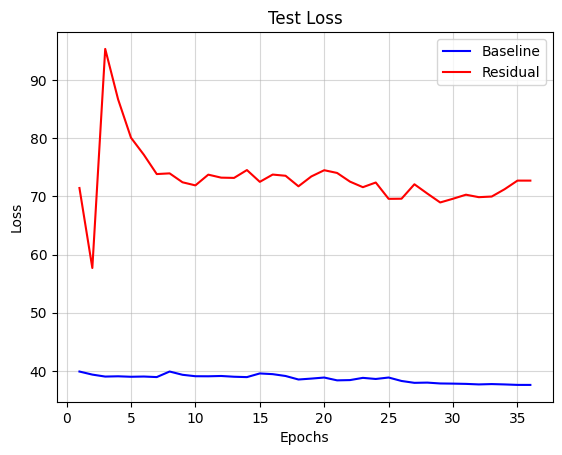

In [56]:
import matplotlib.pyplot as plt

def plot_values(dict1, dict2, key):
    # Get the values for the specified key from the dictionaries
    values1 = dict1.get(key, [])
    values2 = dict2.get(key, [])

    # Determine the minimum number of values for the given key
    min_len = min(len(values1), len(values2))

    # Create x-axis values based on the minimum length
    x = range(1, min_len + 1)

    # Plot the values from dict1 as a blue line
    plt.plot(x, values1[:min_len], color='blue', label='Baseline')

    # Plot the values from dict2 as a red line
    plt.plot(x, values2[:min_len], color='red', label='Residual')

    # Set the labels and title of the plot
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Test Loss')
    plt.grid(alpha=0.5)
    # Add a legend to differentiate between the two dictionaries
    plt.legend()

    # Display the plot
    plt.show()


plot_values(base_5K,residual_5K,'test_loss')